<center><h1>Altanoveo TP</h1></center>

## Importation des librairies

In [1]:
import numpy as np
import pandas as pd
import json
from glob import glob
import spacy
from collections import Counter
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud, STOPWORDS
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

2022-02-24 18:45:43.689232: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-24 18:45:43.689363: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Importation du vocabulaire

In [2]:
nlp = spacy.load("en_core_web_sm")
vocab = list(nlp.vocab.strings)
stop_words = list(nlp.Defaults.stop_words)

## Fonction de vérification du vocabulaire

In [3]:
def keep_in_voc(sentence):
    en_sentence = [token for token in sentence.split(' ') if token in vocab and token not in stop_words]
    return ' '.join(en_sentence)

## Importation des données

## Fonction de suppression des émoticons

In [4]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [5]:
texts = pd.DataFrame()
fire_tweets = glob('*/*output_tweet.json')
without_fire_tweets = glob('without_fire/*output*.json')

for tweet in fire_tweets:
    with open(tweet, 'r') as file:
        try:
            content = json.loads(file.read())['data']
            for elt in content:
                if elt['lang'] == 'en':
                    cleaned_text = remove_emoji(elt['text'].replace('#', '').replace('\n', ' '))
                    cleaned_text = keep_in_voc(cleaned_text)
                    texts = texts.append({'label': True, 'text': cleaned_text.lower()}, ignore_index=True)
        except:
            print("Erreur : pas de données dans le fichier")

for tweet in without_fire_tweets:
    with open(tweet, 'r') as file:
        try:
            content = json.loads(file.read())['data']
            for elt in content:
                if elt['lang'] == 'en':
                    cleaned_text = remove_emoji(elt['text'].replace('#', '').replace('\n', ' '))
                    cleaned_text = keep_in_voc(cleaned_text)
                    texts = texts.append({'label': False, 'text': cleaned_text}, ignore_index=True)
        except:
            print("Erreur : pas de données dans le fichier")

texts.head()

/tmp/ipykernel_3215/3471725048.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts = texts.append({'label': True, 'text': cleaned_text}, ignore_index=True)
/tmp/ipykernel_3215/3471725048.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts = texts.append({'label': True, 'text': cleaned_text}, ignore_index=True)
/tmp/ipykernel_3215/3471725048.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts = texts.append({'label': True, 'text': cleaned_text}, ignore_index=True)
/tmp/ipykernel_3215/3471725048.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts = texts.append({'label': True, 'text': cleaned_text}, ignore_inde

Erreur : pas de données dans le fichier


/tmp/ipykernel_3215/3471725048.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts = texts.append({'label': True, 'text': cleaned_text}, ignore_index=True)
/tmp/ipykernel_3215/3471725048.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts = texts.append({'label': True, 'text': cleaned_text}, ignore_index=True)
/tmp/ipykernel_3215/3471725048.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts = texts.append({'label': True, 'text': cleaned_text}, ignore_index=True)
/tmp/ipykernel_3215/3471725048.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts = texts.append({'label': True, 'text': cleaned_text}, ignore_inde

,label,text
0,True,like fires destroying Greece
1,True,Greece brings control blazes threaten southern...
2,True,Trying find fire help understand fires Greece ...
3,True,Greece brings control blazes threaten southern...
4,True,Greece brings control blazes threaten southern...


## Tf-idf

In [6]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(texts['text'])
feature_names = vectorizer.get_feature_names_out()
denselist = vectors.todense().tolist()
tf_idf = pd.DataFrame(denselist, columns=feature_names)
tf_idf

,00,000,01,014,02,03,04,07,08,09,...,zach,zane,zealand,zero,zeus,zimbabwe,zoe,zone,zones,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data = pd.concat([texts, tf_idf], axis=1)
data.head()

,label,text,00,000,01,014,02,03,04,07,...,zach,zane,zealand,zero,zeus,zimbabwe,zoe,zone,zones,zoo
0,True,like fires destroying Greece,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,True,Greece brings control blazes threaten southern...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,True,Trying find fire help understand fires Greece ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,True,Greece brings control blazes threaten southern...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,True,Greece brings control blazes threaten southern...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train test split

In [8]:
X_train, X, y_train, y = train_test_split(np.asarray(vectors.todense()), data['label'], test_size=0.30)
X_test, X_val, y_test, y_val = train_test_split(X, y, test_size=0.50)

## Pénalisation des prédictions des classes

In [9]:
p0 = len(data) / (2 * Counter(data['label'])[False])
p1 = len(data) / (2 * Counter(data['label'])[True])
class_weights = {0: p0, 1: p1}
print(Counter(data['label']))
print('Poids :', class_weights)

Counter({True: 3568, False: 1676})
Poids : {0: 1.5644391408114557, 1: 0.7348654708520179}


## Modélisation

In [10]:
clf = DecisionTreeClassifier(class_weight=class_weights)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9339263024142312

## Matrice de confusion

In [11]:
confusion_matrix(y_test, clf.predict(X_test))

array([[204,  36],
       [ 16, 531]])

## Schéma de l'arbre de déçision

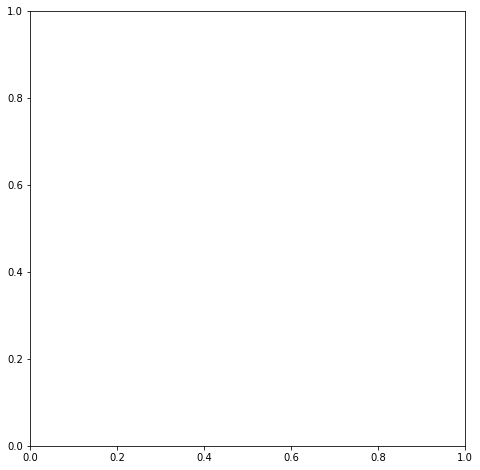

In [15]:

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(" ".join(texts['text']))
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

'like fires destroying GreeceGreece brings control blazes threaten southern EuropeTrying find fire help understand fires Greece relatively it\'s hard closest Clyde Mountain distinct Who know fireGreece brings control blazes threaten southern Europe Europe Source VIAGreece brings control blazes threaten southern EuropeGreece brings control blazes threaten southern EuropeGreece fire Spacegoing speak fires Is Brazil point This insane strangeAs soon crisis fires Greece deteriorated Armenia contact Greek help brotherly Greek case necessity repeatedGreece breathed sigh relief Friday ravaged country brought firefighters southern Europe braced fresh WorldGreece brings control blazes threaten southern EuropeThe Metropolis Austria Hungary expressed support fire victims GreecePhotograph 3 helicopters getting water dump fires fires spread threaten lives Greece RTHow costs Greece buy Russian fire monstersGreek New blaze breaks island fire department said aircraft helicopters sent control new fire c